<a href="https://colab.research.google.com/github/darpan-goyal/CoralClassifier/blob/master/coral_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *

### Create directory and manually uploaded images to respective directory

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
folder = 'orange'

In [0]:
folder = 'red'

In [0]:
folder = 'pink'

You will need to run this cell once per each category.

In [0]:
path = Path(base_dir + 'data/organisms')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/organisms/orange'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/organisms/red'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/organisms/pink'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/organisms/models')]

## Verify images

In [0]:
classes = ['orange','red','pink']

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

orange


red


pink


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['orange', 'pink', 'red']

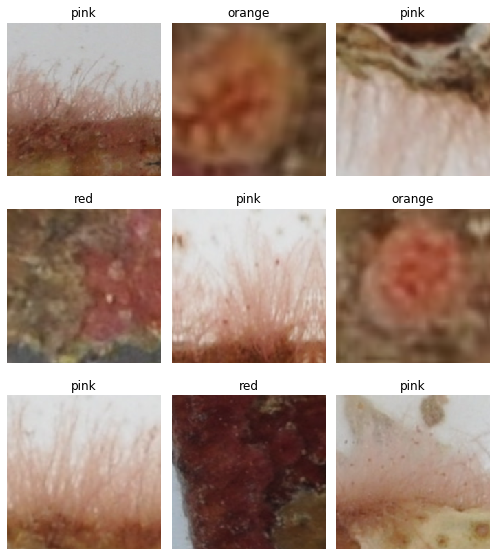

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['orange', 'pink', 'red'], 3, 241, 60)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.565049,1.128703,0.366667,00:03
1,0.842876,1.046848,0.250000,00:02
2,0.566551,0.529237,0.150000,00:02
3,0.429143,0.174620,0.116667,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


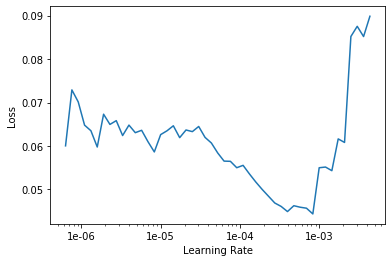

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.081791,0.260392,0.083333,00:02
1,0.066304,0.052602,0.016667,00:02


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

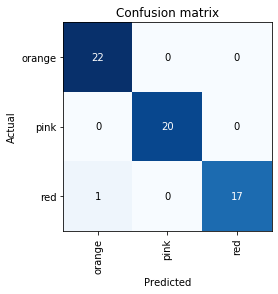

In [0]:
interp.plot_confusion_matrix()